<br>

## Importando Dataset e Pre-Processando

<hr>

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import numpy as np

In [260]:
raw_df = pd.read_csv('ordinal_encoding_mushrooms.csv')

In [261]:
raw_df['label'] = raw_df['label'].map({'p': 1, 'e': 0})

In [262]:
raw_df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,label
0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,0.0,...,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0,1
1,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,...,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0,0
2,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,0.0,...,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0,0
3,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,0.0,...,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0,1
4,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,1.0,...,7.0,7.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,0.0,...,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0,0
8120,5.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,0.0,...,5.0,5.0,0.0,0.0,1.0,4.0,0.0,4.0,2.0,0
8121,2.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,...,5.0,5.0,0.0,1.0,1.0,4.0,0.0,1.0,2.0,0
8122,3.0,3.0,4.0,0.0,8.0,1.0,0.0,1.0,0.0,1.0,...,7.0,7.0,0.0,2.0,1.0,0.0,7.0,4.0,2.0,1


In [263]:
encoder = OneHotEncoder(sparse_output=False)
categoric_columns = list(raw_df.columns)[:-1]
encoded_data = encoder.fit_transform(raw_df[categoric_columns])

In [264]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categoric_columns))

In [265]:
encoded_df

,cap-shape_0.0,cap-shape_1.0,cap-shape_2.0,cap-shape_3.0,cap-shape_4.0,cap-shape_5.0,cap-surface_0.0,cap-surface_1.0,cap-surface_2.0,cap-surface_3.0,...,population_3.0,population_4.0,population_5.0,habitat_0.0,habitat_1.0,habitat_2.0,habitat_3.0,habitat_4.0,habitat_5.0,habitat_6.0
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8121,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [266]:
df_encoded = pd.concat([raw_df.drop(columns=categoric_columns), encoded_df], axis=1)

In [267]:
df_encoded

,label,cap-shape_0.0,cap-shape_1.0,cap-shape_2.0,cap-shape_3.0,cap-shape_4.0,cap-shape_5.0,cap-surface_0.0,cap-surface_1.0,cap-surface_2.0,...,population_3.0,population_4.0,population_5.0,habitat_0.0,habitat_1.0,habitat_2.0,habitat_3.0,habitat_4.0,habitat_5.0,habitat_6.0
0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8121,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [268]:
df_encoded.to_csv('onehotencoder_raw_113_columns.csv', index=False)

<br>

## Applying Threashold code

<hr>

In [269]:
df_aux = df_encoded.copy().drop('label', axis=1)
y = df_encoded['label']

In [270]:
X = df_aux.values
selector = VarianceThreshold(threshold=0.05)  
X_reduced = selector.fit_transform(X)
df_reduced_threashold = pd.DataFrame(X_reduced)

In [271]:
X

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [272]:
df_reduced_threashold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 63 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8124 non-null   float64
 1   1       8124 non-null   float64
 2   2       8124 non-null   float64
 3   3       8124 non-null   float64
 4   4       8124 non-null   float64
 5   5       8124 non-null   float64
 6   6       8124 non-null   float64
 7   7       8124 non-null   float64
 8   8       8124 non-null   float64
 9   9       8124 non-null   float64
 10  10      8124 non-null   float64
 11  11      8124 non-null   float64
 12  12      8124 non-null   float64
 13  13      8124 non-null   float64
 14  14      8124 non-null   float64
 15  15      8124 non-null   float64
 16  16      8124 non-null   float64
 17  17      8124 non-null   float64
 18  18      8124 non-null   float64
 19  19      8124 non-null   float64
 20  20      8124 non-null   float64
 21  21      8124 non-null   float64
 22  

In [273]:
df_encoded.to_csv('onehotencoder_threashholded_63_columns.csv', index=False)

<br>

## leveraging pca...

<hr>

In [305]:
## Import
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [389]:
results_pca = {}
df_aux_pca = {}
for n in range(30, 65):
    pca = PCA(n_components = n)  
    X_pca = pca.fit_transform(X)
    results_pca[n] = X_pca

In [390]:
kfold=KFold(n_splits=5, shuffle=True, random_state=0)
scores_results = {}
X_results = {}
scaler = StandardScaler()
for results in results_pca:
    X_results[results] = pd.DataFrame(results_pca[results])
    X_train, X_test, y_train, y_test = train_test_split(X_results[results], y, test_size = 0.2, random_state = 42)
    X_train = pd.DataFrame(X_train)
    cols = X_train.columns
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_train = pd.DataFrame(X_train, columns=[cols])
    X_test = pd.DataFrame(X_test, columns=[cols])
    classifier = svm.SVC(kernel='rbf', C=1, gamma='auto').fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    scores_results[results] = cross_val_score(classifier, X_results[results], y, scoring = 'accuracy', cv=5)


In [391]:
scores_results

{30: array([0.77538462, 0.99938462, 0.95630769, 1.        , 0.62315271]),
 31: array([0.77723077, 0.99938462, 0.95630769, 1.        , 0.62315271]),
 32: array([0.76738462, 0.99938462, 0.95630769, 1.        , 0.62253695]),
 33: array([0.77784615, 0.99938462, 0.95630769, 1.        , 0.62007389]),
 34: array([0.77476923, 0.99938462, 0.95630769, 1.        , 0.62007389]),
 35: array([0.77476923, 0.99938462, 0.95630769, 1.        , 0.62007389]),
 36: array([0.76861538, 0.99938462, 0.95630769, 1.        , 0.61945813]),
 37: array([0.77846154, 0.99938462, 0.95630769, 1.        , 0.61884236]),
 38: array([0.77292308, 0.99938462, 0.95630769, 1.        , 0.62007389]),
 39: array([0.76430769, 0.99938462, 0.95630769, 1.        , 0.62130542]),
 40: array([0.76      , 0.99938462, 0.95630769, 1.        , 0.61945813]),
 41: array([0.76369231, 0.99938462, 0.95323077, 1.        , 0.6182266 ]),
 42: array([0.768     , 0.99938462, 0.95507692, 1.        , 0.6182266 ]),
 43: array([0.76492308, 0.99938462, 0.

In [3]:
df_aux_2 = pd.DataFrame(results_pca[56])

NameError: name 'results_pca' is not defined

In [196]:
df_aux_2

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-1.145510,-0.398433,0.662176,-1.597304,-0.675553,-0.131323,0.750944,-0.189732,-0.545461,0.992253,...,0.278673,0.251450,0.165981,0.583202,0.361059,-0.397147,0.013783,-0.541140,-0.179937,0.520839
1,-1.401846,0.543146,0.864638,-1.301010,-0.537131,-0.117065,0.303622,-0.569255,0.191362,-0.626256,...,0.055240,-0.061773,0.286294,0.337810,-0.061995,-0.079288,-0.002098,0.246430,-0.216127,0.330626
2,-1.553022,0.300245,0.697189,-1.486290,0.128617,-0.274382,0.576293,-0.221918,0.260210,-0.627663,...,0.727534,0.179977,-0.278765,-0.548377,-0.353879,0.072972,0.006155,-0.111407,0.368588,0.381801
3,-1.230153,-0.106082,0.387138,-1.743282,-0.869106,-0.470228,-0.223001,0.350444,-0.687194,0.758633,...,0.111204,0.397762,-0.124942,-0.118555,0.131721,-0.339427,0.008594,-0.333696,-0.100047,-0.032006
4,-0.755858,-0.479208,1.723296,1.270926,-0.529001,0.343479,-0.155028,-0.538014,0.039600,-0.751750,...,0.062306,0.184636,0.145566,0.127450,0.104305,0.134986,-0.000059,-0.281406,-0.261995,0.344541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.426792,0.097345,0.253743,-0.627350,1.588775,2.111153,1.277834,-1.245236,-0.711192,0.164032,...,0.189013,-0.013645,0.236883,0.100620,0.044125,0.189543,-0.005765,0.117682,-0.453933,-0.140141
8120,-0.353063,0.057679,0.060119,-0.638084,0.673771,2.124295,1.521909,-1.269597,-0.787942,0.100668,...,0.018896,-0.377126,0.017749,-0.087973,-0.200820,0.122303,-0.000634,0.071150,-0.093853,-0.130932
8121,-0.557123,0.205624,0.148653,-0.395227,1.935082,1.540399,1.463351,-1.146244,-1.005586,0.187133,...,-0.221211,-0.339814,-0.129750,-0.412633,-0.209064,0.182966,-0.007874,0.084815,-0.241396,-0.072814
8122,1.344177,-1.885658,0.253724,-0.519050,0.166279,-0.120767,-0.528040,0.048629,-0.730592,0.024647,...,0.154428,0.211844,-0.088030,-0.096968,0.037886,-0.394243,-0.701665,-0.262396,-0.064505,-0.343410


In [197]:
X = df_aux_2

<br>

## Aplicando o modelo Dummy

<hr>

In [ ]:
dummy_clf = DummyClassifier().fit(X_train, y_train)

In [407]:
scores = cross_val_score(classifier, X_results[56], y, scoring = "f1_macro")
scores

array([0.87769745, 0.99938378, 0.95415443, 1.        , 0.53269713])

In [408]:
print(sum(scores)/5)

0.8727865557021947


In [396]:
score_results_plot = pd.DataFrame(data=scores_results).mean()

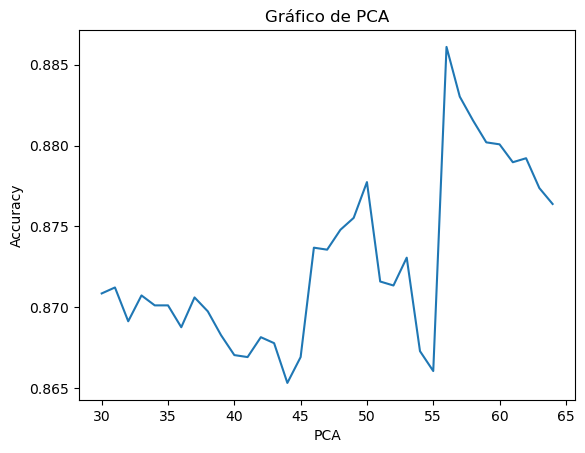

In [398]:

score_results_plot.plot()
plt.title('Gráfico de PCA')
plt.xlabel('PCA')
plt.ylabel('Accuracy')
plt.show()